# 📝 Exercise M5.02

The aim of this exercise is to find out whether a decision tree model is able
to extrapolate.

By extrapolation, we refer to values predicted by a model outside of the range
of feature values seen during the training.

We first load the regression data.

In [1]:
import pandas as pd

penguins = pd.read_csv("./datasets/penguins_regression.csv")

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data_train, target_train = penguins[[feature_name]], penguins[target_name]

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

First, create two models, a linear regression model and a decision tree
regression model, and fit them on the training data. Limit the depth at 3
levels for the decision tree.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(max_depth=3, random_state=0)

linear_model.fit(data_train, target_train)
tree_model.fit(data_train, target_train)


,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",0
,"max_leaf_

Create a synthetic dataset containing all possible flipper length from the
minimum to the maximum of the training dataset. Get the predictions of each
model using this dataset.

In [6]:
import pandas as pd
import numpy as np

flipper_range = pd.DataFrame(
    np.linspace(
        data_train.min().values[0],
        data_train.max().values[0],
        300
    ),
    columns=[feature_name]
)

linear_pred = linear_model.predict(flipper_range)
tree_pred = tree_model.predict(flipper_range)


Create a scatter plot containing the training samples and superimpose the
predictions of both models on the top.

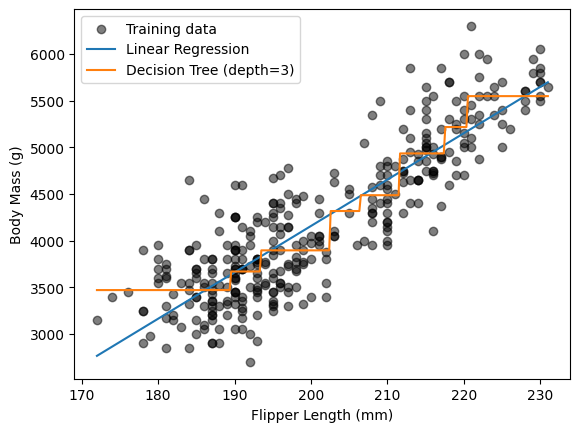

In [7]:
import matplotlib.pyplot as plt

plt.scatter(
    data_train[feature_name],
    target_train,
    color="black",
    alpha=0.5,
    label="Training data"
)

plt.plot(flipper_range, linear_pred, label="Linear Regression")
plt.plot(flipper_range, tree_pred, label="Decision Tree (depth=3)")

plt.xlabel(feature_name)
plt.ylabel(target_name)
plt.legend()
plt.show()


Now, we check the extrapolation capabilities of each model. Create a dataset
containing a broader range of values than your previous dataset, in other
words, add values below and above the minimum and the maximum of the flipper
length seen during training.

In [11]:
flipper_range_extrapolation = np.linspace(
    data_train.min().values[0] - 20,
    data_train.max().values[0] + 20,
    300
).reshape(-1, 1)


Finally, make predictions with both models on this new interval of data.
Repeat the plotting of the previous exercise.

c:\Users\hp\Desktop\bootcamp\week-3\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\hp\Desktop\bootcamp\week-3\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


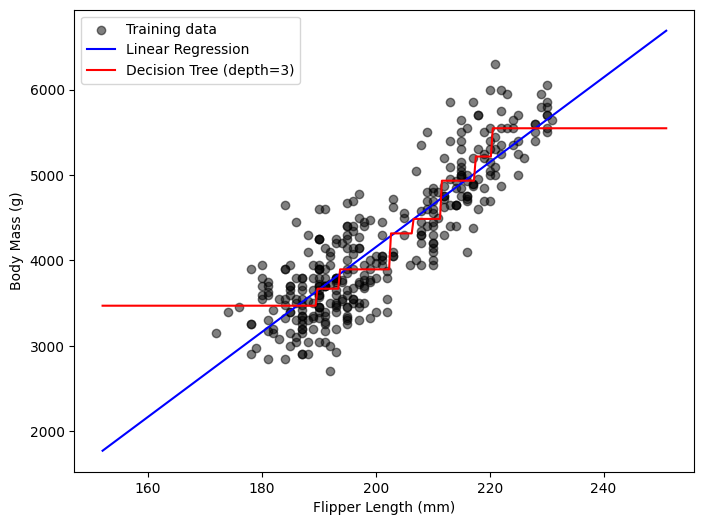

In [13]:
import matplotlib.pyplot as plt

linear_pred_ext = linear_model.predict(flipper_range_extrapolation)
tree_pred_ext = tree_model.predict(flipper_range_extrapolation)

plt.figure(figsize=(8, 6))
plt.scatter(data_train[feature_name], target_train, color="black", alpha=0.5, label="Training data")
plt.plot(flipper_range_extrapolation, linear_pred_ext, color="blue", label="Linear Regression")
plt.plot(flipper_range_extrapolation, tree_pred_ext, color="red", label="Decision Tree (depth=3)")
plt.xlabel(feature_name)
plt.ylabel(target_name)
plt.legend()
plt.show()
